In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
import random
import math
import copy

df = pd.read_csv('fifa20.csv')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#data exploration
df.shape

(18278, 104)

In [3]:
#data types
print('tipe data')
df.dtypes

tipe data


sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [4]:
#show missing values
print('apakah ada missing values?')
df.isnull().values.any()

apakah ada missing values?


True

In [5]:
#count missing values
print('jumlah missing values')
df.isnull().sum()

jumlah missing values


sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [6]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [7]:
#get 5 last row
df.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,...,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,...,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,...,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,...,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,...,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [8]:
#info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [9]:
#description column of dataframe
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [0]:
#detect missing values $ fill missing values
#fill 6 feature with mean
df['pace'] = df['pace'].fillna(df['pace'].median())
df['shooting'] = df['shooting'].fillna(df['shooting'].median())
df['passing'] = df['passing'].fillna(df['passing'].median())
df['dribbling'] = df['dribbling'].fillna(df['dribbling'].median())
df['defending'] = df['defending'].fillna(df['defending'].median())
df['physic'] = df['physic'].fillna(df['physic'].median())
df = df.fillna(0) #fill 0 for all missing values

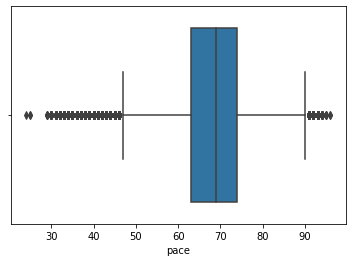

In [11]:
#outlier pace
sns.boxplot(df['pace'])

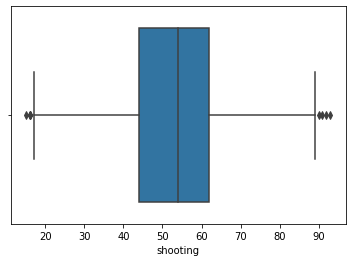

In [12]:
#outlier shooting
sns.boxplot(df['shooting'])

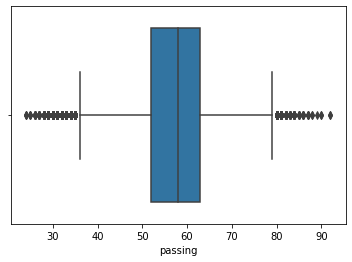

In [13]:
#outlier passing
sns.boxplot(df['passing'])

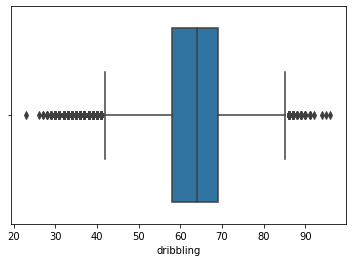

In [14]:
#outlier dribbling
sns.boxplot(df['dribbling'])

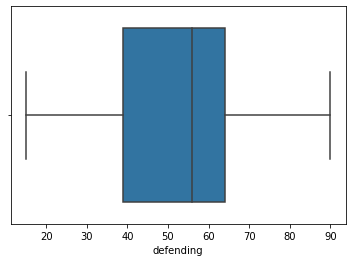

In [15]:
#outlier defending
sns.boxplot(df['defending'])

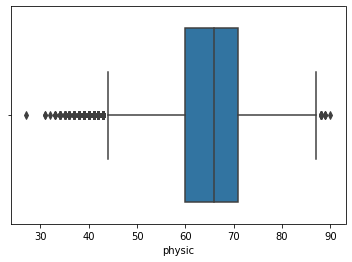

In [16]:
#outlier physic
sns.boxplot(df['physic'])

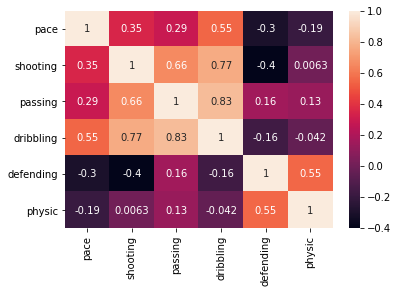

In [17]:
#making correlation matrix
data = {'pace':df['pace'],
        'shooting':df['shooting'],
        'passing':df['passing'],
        'dribbling':df['dribbling'],
        'defending':df['defending'],
        'physic':df['physic']}

new_df = pd.DataFrame(data, columns=['pace','shooting','passing','dribbling','defending','physic'])

corMatrix = new_df.corr()
sns.heatmap(corMatrix, annot=True)
plt.show()

In [18]:
#doing binning & categorical encoding
#category 1: >75 = strong/4
#category 2: >50 && <=75 = normal/3
#category 3: >25 && <=50 = weak/2
#category 4: <=25 = very weak/1
for i in range(len(df)):
  if df['pace'][i] >= 75:
    df['pace'][i] = 4
    if df['defending'][i] >= 75:
      df['defending'][i] = 4
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
    elif (df['defending'][i]) > 50 and (df['defending'][i] <= 75):
      df['defending'][i] = 3
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
    elif (df['defending'][i]) > 25 and (df['defending'][i] <= 50):
      df['defending'][i] = 2
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
    elif df['defending'][i] <= 25:
      df['defending'][i] = 1
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
  elif (df['pace'][i]>50) and (df['pace'][i]<=75):
    df['pace'][i] = 3
    if df['defending'][i] >= 75:
      df['defending'][i] = 4
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
    elif (df['defending'][i]) > 50 and (df['defending'][i] <= 75):
      df['defending'][i] = 3
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
    elif (df['defending'][i]) > 25 and (df['defending'][i] <= 50):
      df['defending'][i] = 2
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
    elif df['defending'][i] <= 25:
      df['defending'][i] = 1
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
  elif (df['pace'][i]>25) and (df['pace'][i]<=50):
    df['pace'][i] = 2
    if df['defending'][i] >= 75:
      df['defending'][i] = 4
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
    elif (df['defending'][i]) > 50 and (df['defending'][i] <= 75):
      df['defending'][i] = 3
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
    elif (df['defending'][i]) > 25 and (df['defending'][i] <= 50):
      df['defending'][i] = 2
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
    elif df['defending'][i] <= 25:
      df['defending'][i] = 1
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
  elif df['pace'][i] <= 25:
    df['pace'][i] = 1
    if df['defending'][i] >= 75:
      df['defending'][i] = 4
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
    elif (df['defending'][i]) > 50 and (df['defending'][i] <= 75):
      df['defending'][i] = 3
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
    elif (df['defending'][i]) > 25 and (df['defending'][i] <= 50):
      df['defending'][i] = 2
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1
    elif df['defending'][i] <= 25:
      df['defending'][i] = 1
      if df['physic'][i] >= 75:
        df['physic'][i] = 4
      elif (df['physic'][i] > 50) and (df['physic'][i] <= 75):
        df['physic'][i] = 3
      elif (df['physic'][i] > 25) and (df['physic'][i] <= 50):
        df['physic'][i] = 2
      elif df['physic'][i] <= 25:
        df['physic'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-p

In [0]:
#Data Splitting
new_df = df[['pace', 'defending', 'physic']].copy() #copy dataframe dengan hanya 3 label(pace, defending, physic)
train_df = new_df.head(14622) #data train mengambil sebanyak 14622 data pertama 80% dataset
test_df = new_df.tail(3656) #data test mengambil sebanyak 3656 data pertama 20% dataset

In [20]:
print('Data Train')
print(train_df)

Data Train
       pace  defending  physic
0       4.0        2.0     3.0
1       4.0        2.0     4.0
2       4.0        2.0     3.0
3       3.0        3.0     3.0
4       4.0        2.0     3.0
...     ...        ...     ...
14617   2.0        3.0     4.0
14618   3.0        3.0     3.0
14619   3.0        3.0     3.0
14620   3.0        3.0     3.0
14621   3.0        3.0     3.0

[14622 rows x 3 columns]


In [21]:
print('Data Test')
print(test_df)

Data Test
       pace  defending  physic
14622   3.0        2.0     3.0
14623   3.0        3.0     3.0
14624   3.0        3.0     3.0
14625   3.0        2.0     3.0
14626   3.0        2.0     2.0
...     ...        ...     ...
18273   3.0        2.0     3.0
18274   3.0        2.0     2.0
18275   3.0        2.0     3.0
18276   3.0        2.0     3.0
18277   3.0        2.0     3.0

[3656 rows x 3 columns]


In [22]:
#K-means Clustering
def calculateMeanDistance(final_df,centroid):
    value = []
    for index, row in final_df.iterrows():
        value_l = euclideanDistance([row['pace'],row['defending'],row['physic']],centroid)
        value.append(value_l)
    return sum(value) / len(value)
 
def euclideanDistance(p1,p2):
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(p1, p2)]))
 
def newCentroid(new_df,new_coor_centroid):
    coor_centroid = []
    for x in range(5):
        sum_pace = 0
        sum_defending = 0
        sum_physic = 0
        filtered_df = new_df[new_df['centroid'] == x]
        
        if filtered_df.shape[0] != 0:
            for index, row in filtered_df.iterrows():
                sum_pace += row['pace']
                sum_defending += row['defending']
                sum_physic += row['physic']

            if filtered_df.shape[0] == 0:
                print(filtered_df)

            mean_pace = sum_pace/filtered_df.shape[0]
            mean_defending = sum_defending/filtered_df.shape[0]
            mean_physic = sum_physic/filtered_df.shape[0]
            coor = [mean_pace,mean_defending,mean_physic]
        else:
            coor = new_coor_centroid[x]
        coor_centroid.append(coor)
        
    return coor_centroid
 
# assign data train yang sudah di binning
new_df = train_df

# ubah pace, defending, physic menjadi int
new_df = new_df.astype({"pace":'int64', "defending":'int64', "physic":'int64'})

# Create empty column to store closest centroid
new_df["centroid"] = 0
print(new_df)
# Initialize the first three centroids
initial_centroid = []
for x in range(5):
    value = random.randint(0, new_df.shape[0]-1)
    while value in  initial_centroid:
        value = random.randint(0, new_df.shape[0]-1)
    initial_centroid.append(value)
 
# First iteration to get the initial centroid
for index, row in new_df.iterrows():
    dist_l = []
    p1 = [row['pace'],row['defending'],row['physic']]
    
    for x in range(5):
        p2 = [new_df.loc[initial_centroid[x],'pace'],new_df.loc[initial_centroid[x],'defending'],new_df.loc[initial_centroid[x],'physic']]
        value = pow((p1[0] - p2[0]),2) + pow((p1[1] - p2[1]),2) + pow((p1[2] - p2[2]),2)
        dist_l.append(math.sqrt(value))
      
    row['centroid'] = np.argmin(dist_l)

# meng spwan centroid
new_coor_centroid = []
for x in range(5):
    point = [new_df.loc[initial_centroid[x],'pace'],new_df.loc[initial_centroid[x],'defending'],new_df.loc[initial_centroid[x],'physic']]
    new_coor_centroid.append(point)
 
# Iteration to find the cluster
while True:
    new_centroid = newCentroid(new_df,new_coor_centroid)
    new_coor_centroid = copy.deepcopy(new_centroid)
    prev_df = copy.deepcopy(new_df)
    for index, row in new_df.iterrows():
        dist_l = []
        p1 = [row['pace'],row['defending'],row['physic']]
        
        for x in range(5):
            distance = euclideanDistance(p1, new_centroid[x])
            dist_l.append(distance)
            
        row['centroid'] = np.argmin(dist_l)
    
    prev_1 = prev_df[prev_df['centroid'] == 0]
    prev_2 = prev_df[prev_df['centroid'] == 1]
    prev_3 = prev_df[prev_df['centroid'] == 2]
    prev_4 = prev_df[prev_df['centroid'] == 3]
    prev_5 = prev_df[prev_df['centroid'] == 4]
    
    current_1 = new_df[new_df['centroid'] == 0]
    current_2 = new_df[new_df['centroid'] == 1]
    current_3 = new_df[new_df['centroid'] == 2]
    current_4 = new_df[new_df['centroid'] == 3]
    current_5 = new_df[new_df['centroid'] == 4]
    if prev_1.equals(current_1) and prev_2.equals(current_2) and prev_3.equals(current_3) and prev_4.equals(current_4) and prev_5.equals(current_5):
        break;

mean_distance_1 = calculateMeanDistance(current_1,new_coor_centroid[0])
mean_distance_2 = calculateMeanDistance(current_2,new_coor_centroid[1])
mean_distance_3 = calculateMeanDistance(current_3,new_coor_centroid[2])
mean_distance_4 = calculateMeanDistance(current_1,new_coor_centroid[3])
mean_distance_5 = calculateMeanDistance(current_2,new_coor_centroid[4])
# memasukkan data cluster
cluster = []
for i in range(len(new_df)):
  if new_df['centroid'][i] == 0:
    cluster.append(new_df['centroid'][i])
  elif new_df['centroid'][i] == 1:
    cluster.append(new_df['centroid'][i])
  elif new_df['centroid'][i] == 2:
    cluster.append(new_df['centroid'][i])
  elif new_df['centroid'][i] == 3:
    cluster.append(new_df['centroid'][i])
  elif new_df['centroid'][i] == 4:
    cluster.append(new_df['centroid'][i])
print('after K-means Clustering')
print(new_df)

       pace  defending  physic  centroid
0         4          2       3         0
1         4          2       4         0
2         4          2       3         0
3         3          3       3         0
4         4          2       3         0
...     ...        ...     ...       ...
14617     2          3       4         0
14618     3          3       3         0
14619     3          3       3         0
14620     3          3       3         0
14621     3          3       3         0

[14622 rows x 4 columns]
after K-means Clustering
       pace  defending  physic  centroid
0         4          2       3         2
1         4          2       4         2
2         4          2       3         2
3         3          3       3         1
4         4          2       3         2
...     ...        ...     ...       ...
14617     2          3       4         0
14618     3          3       3         1
14619     3          3       3         1
14620     3          3       3         1
14621 

In [23]:
# Split-out validation data train
array = new_df.values
X = array[:,0:3]
Y = array[:,3]
 
validation_size = 0.3
seed = 7
scoring = 'accuracy'
 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
print('split out validation')
print('data train')
train_data = pd.DataFrame(X_train, columns=['pace','defending','physic'])
print(train_data)
print('data validation')
valid_data = pd.DataFrame(X_validation, columns=['pace','defending','physic'])
print(valid_data)
# Test options and evaluation metric

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
 
 

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

split out validation
data train
       pace  defending  physic
0         4          2       2
1         3          3       3
2         3          3       3
3         3          2       3
4         3          2       3
...     ...        ...     ...
10230     3          3       3
10231     4          2       3
10232     3          3       3
10233     3          2       3
10234     3          3       3

[10235 rows x 3 columns]
data validation
      pace  defending  physic
0        4          2       3
1        3          4       4
2        3          3       3
3        3          3       3
4        3          3       3
...    ...        ...     ...
4382     2          3       4
4383     3          2       3
4384     3          3       3
4385     3          4       3
4386     3          3       3

[4387 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 1.000000 (0.000000)
LDA: 0.966586 (0.004380)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 0.966585 (0.004094)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 1.000000 (0.000000)


In [24]:
# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
 
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[ 719    0    0    0    0]
 [   0 1712    0    0    0]
 [   0    0 1443    0    0]
 [   0    0    0  111    0]
 [   0    0    0    0  402]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00      1712
           2       1.00      1.00      1.00      1443
           3       1.00      1.00      1.00       111
           4       1.00      1.00      1.00       402

    accuracy                           1.00      4387
   macro avg       1.00      1.00      1.00      4387
weighted avg       1.00      1.00      1.00      4387



In [25]:
# Create a function to guess centroid of data test
def guessCentroid(pace, defending, physic):
  centroid = 0
  if(knn.predict([[pace, defending, physic]]))==0:
    centroid = 0
  elif(knn.predict([[pace, defending, physic]]))==1:
    centroid = 1
  elif(knn.predict([[pace, defending, physic]]))==2:
    centroid = 2
  elif(knn.predict([[pace, defending, physic]]))==3:
    centroid = 3
  elif(knn.predict([[pace, defending, physic]]))==4:
    centroid = 4
  return centroid


#fill data test
#create empty centroid column
test_df["centroid"] = 0
test_array = test_df.values
data_test = pd.DataFrame(test_array, columns=['pace','defending','physic','centroid'])
# ubah data test column pace, defending, physic, dan centroid menjadi int
data_test = data_test.astype({"pace":'int64', "defending":'int64', "physic":'int64', "centroid":'int64'})

for i in range(len(data_test)):
  getCentroid = guessCentroid(data_test['pace'][i], data_test['defending'][i], data_test['physic'][i])
  data_test['centroid'][i] = getCentroid

X = data_test.drop(['centroid'], axis=1)
Y = data_test["centroid"]
print('hasil data test')
print(data_test)
#accuracy of model knn to data test
kfold = KFold(n_splits=10, random_state=seed)
scores = cross_val_score(knn, X, Y, cv=kfold)
Y_validation = Y.values
predictions = new_df["centroid"].values
print("Accuracy: %f, %f" % (scores.mean()*100, scores.std()))

hasil data test
      pace  defending  physic  centroid
0        3          2       3         2
1        3          3       3         1
2        3          3       3         1
3        3          2       3         2
4        3          2       2         2
...    ...        ...     ...       ...
3651     3          2       3         2
3652     3          2       2         2
3653     3          2       3         2
3654     3          2       3         2
3655     3          2       3         2

[3656 rows x 4 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 99.917958, 0.001253


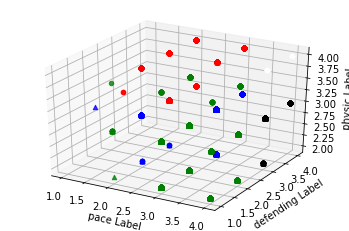

In [26]:
# visualize data train and data test result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = new_df['pace'].values
ys = new_df['defending'].values
zs = new_df['physic'].values

for i in range(len(new_df)):
  if new_df['centroid'][i]==0:
    ax.scatter(xs[i], ys[i], zs[i], alpha=0.8, c='r', marker='o', label="0")
  elif new_df['centroid'][i]==1:
    ax.scatter(xs[i], ys[i], zs[i], alpha=0.8, c='b', marker='o', label="1")
  elif new_df['centroid'][i]==2:
    ax.scatter(xs[i], ys[i], zs[i], alpha=0.8, c='g', marker='o', label="2")
  elif new_df['centroid'][i]==3:
    ax.scatter(xs[i], ys[i], zs[i], alpha=0.8, c='w', marker='o', label="3")
  elif new_df['centroid'][i]==4:
    ax.scatter(xs[i], ys[i], zs[i], alpha=0.8, c='k', marker='o', label="4")

xt = data_test['pace'].values
yt = data_test['defending'].values
zt = data_test['physic'].values

for i in range(len(data_test)):
  if data_test['centroid'][i]==0:
    ax.scatter(xt[i], yt[i], zt[i], alpha=0.8, c='r', marker='^', label="0")
  elif data_test['centroid'][i]==1:
    ax.scatter(xt[i], yt[i], zt[i], alpha=0.8, c='b', marker='^', label="1")
  elif data_test['centroid'][i]==2:
    ax.scatter(xt[i], yt[i], zt[i], alpha=0.8, c='g', marker='^', label="2")
  elif data_test['centroid'][i]==3:
    ax.scatter(xt[i], yt[i], zt[i], alpha=0.8, c='w', marker='^', label="3")
  elif data_test['centroid'][i]==4:
    ax.scatter(xt[i], yt[i], zt[i], alpha=0.8, c='k', marker='^', label="4")

ax.set_xlabel('pace Label')
ax.set_ylabel('defending Label')
ax.set_zlabel('physic Label')

plt.show()

In [27]:
#Evaluation Matrix
predictions = knn.predict(X)
 
print(accuracy_score(Y, predictions))
print(confusion_matrix(Y, predictions))
print(classification_report(Y, predictions))

1.0
[[ 103    0    0    0    0]
 [   0 1729    0    0    0]
 [   0    0 1720    0    0]
 [   0    0    0    1    0]
 [   0    0    0    0  103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00      1729
           2       1.00      1.00      1.00      1720
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00       103

    accuracy                           1.00      3656
   macro avg       1.00      1.00      1.00      3656
weighted avg       1.00      1.00      1.00      3656

